# A Notebook for Smoothing and Segmenting Images

This notebook allows you to smooth and segment images.

YIBO: please add references and pointers: The notebook uses the XYZ library and the PQR library...

## Preliminary Setup

The following cell contains some predefined functions to smooth image and segment it. When you run the cell, the definitions of these functions will be incorporated into the notebook.

In [10]:
from scipy import ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
from skimage import feature,io,color,util
from skimage.filters import gaussian,threshold_mean,rank,sobel
from skimage.morphology import watershed,erosion,dilation,disk

def loadIMG():
    filename=raw_input("Please input the image filename:")
    #filename = os.path.abspath('rocks.jpg')
    img = io.imread(filename)
    #if len(img)!=2:
    #    img = color.rgb2gray(img)
    return img

def Smooth(img):
    plt.clf()
    smoothedImg = gaussian(img,sigma=1)
    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3),sharex=True, sharey=True)
    ax1.imshow(img, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(smoothedImg, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Smoothed Image', fontsize=10)
    fig.tight_layout()
    plt.show() 
    return smoothedImg
    
def Segment(img):
    if len(img)!=2:
        img = color.rgb2gray(img)
    markers = np.zeros_like(img)
    markers[img < 0.65] = 1
    markers[img > 0.65] = 2
    #print markers
    segmentation = watershed(img, markers)
    return segmentation

## Smooth an image
Run the following cell and input the filename of an image that you want to process. 

Pleanse input the image filename:yg-cedar2017.png


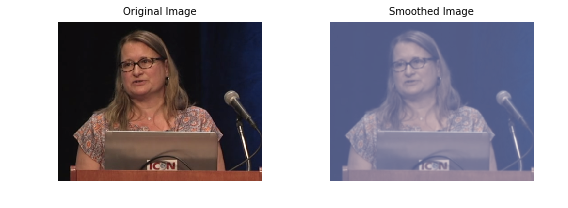

In [3]:
img=loadIMG()
smoothedImg=Smooth(img)

## Segment an image
Run the following cell and input the filename of an image that you want to process. 

YIBO: the below did not work as I wanted, I think you have to change the Segment function to print the two images.

In [13]:
img=loadIMG()
smoothedImg=Segment(img)

Please input the image filename:yg-cedar2017.png


## Combining Smoothing and Segmenting

The cell below defines a function to smooth and then segment an image.  It will output the original image, the segmented image, and the image after smoothing and then segmenting it.

In [9]:
def plotSmoothThenSegment(img1,img3):
    img2=Segment(img1)
    img3=Segment(img3)
    fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),sharex=True, sharey=True)
    ax1.imshow(img1, cmap=plt.cm.gray)
    ax1.axis('off')
    ax1.set_title('Original Image', fontsize=10)
    ax2.imshow(img2, cmap=plt.cm.gray)
    ax2.axis('off')
    ax2.set_title('Segmented Image', fontsize=10)
    ax3.imshow(img3, cmap=plt.cm.gray)
    ax3.axis('off')
    ax3.set_title('Smoothed Then Segmented Image', fontsize=10)
    fig.tight_layout()
    plt.show() 

Running the following cell will execute that function with the image you choose. 

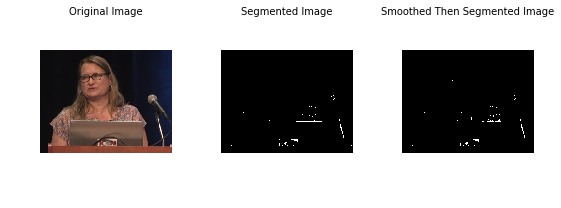

In [4]:
plotSmoothThenSegment(img,smoothedImg)